## Strava Data Analysis

This notebook join all the analysis made individually for the strava data as a final project for Practice: Software Development(Python) course. 

In [41]:
#Check the functions available in the .py
import strava_analysis
dir(strava_analysis)


['DBSCAN',
 'DistanceBand',
 'G_Local',
 'HeatMap',
 'KNN',
 'KernelDensity',
 'MarkerCluster',
 'Moran_Local',
 'PCA',
 'Point',
 'Polygon',
 'StandardScaler',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add_heatmap_layers',
 'add_layer_control',
 'add_legend',
 'advanced_hotspot_analysis',
 'cm',
 'create_activity_locations_plot',
 'create_base_map',
 'create_clusters_plot',
 'create_correlation_heatmap',
 'create_dashboard_html',
 'create_distance_speed_scatter',
 'create_heatmap',
 'create_heatmap_data',
 'create_hotspots_plot',
 'create_interactive_map',
 'create_performance_distributions_plot',
 'create_temporal_patterns_plot',
 'ctx',
 'datetime',
 'decode_polyline',
 'display_html_map_simple',
 'extract_lat_lon',
 'folium',
 'generate_comprehensive_report',
 'go',
 'gpd',
 'load_strava_data',
 'main_analysis',
 'make_subplots',
 'map_activities_colored_by_speed',
 'map_df',
 'np',
 'pd',
 'pdist',
 'plot_sp

In [42]:
# Import your functions
from strava_analysis import load_strava_data, plot_speed_distribution, extract_lat_lon, map_df, map_activities_colored_by_speed

### 1. Load the data
We use a function `load_strava_data()` that selects relevant columns, parses dates, and removes incomplete rows.


In [43]:
#Use first function, upload the data
df = load_strava_data("data/nicole_strava.csv")
df.head()

loaded 245 of your raw activities
processed 124 of your activities with enhanced features


,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,...,performance_score,intensity_score,datetime,hour,day_of_week,month,is_weekend,season,distance_category,speed_category
0,2,Lunch Walk,3577.7,4433,9352,83.4,Walk,Walk,14870905732,2025-06-21T09:32:17Z,...,-0.794184,0.150806,2025-06-21 09:32:17+00:00,9,5,6,True,2,Short,Slow
1,2,Morning Walk,8080.4,9368,79083,93.4,Walk,Walk,14870905942,2025-06-20T08:58:27Z,...,-0.715566,0.227419,2025-06-20 08:58:27+00:00,8,4,6,False,2,Medium,Slow
2,2,Afternoon Walk 🇨🇿,7417.3,7577,23468,133.2,Walk,Walk,14853128173,2025-06-19T12:37:46Z,...,-0.672117,0.264919,2025-06-19 12:37:46+00:00,12,3,6,False,2,Medium,Slow
4,2,Night Ride,11316.2,2907,50246,30.9,Ride,Ride,14842808101,2025-06-18T06:01:11Z,...,-0.101645,0.460484,2025-06-18 06:01:11+00:00,6,2,6,False,2,Medium,Moderate
6,2,Munich to Salzburg 🇩🇪🇦🇹,180945.0,37425,168127,1119.6,Ride,Ride,14810343297,2025-06-13T17:06:04Z,...,3.136372,0.944355,2025-06-13 17:06:04+00:00,17,4,6,False,2,Ultra,Moderate


### 2. Visualize Speed
The function `plot_speed_distribution()` compares the average and max speeds using histograms.


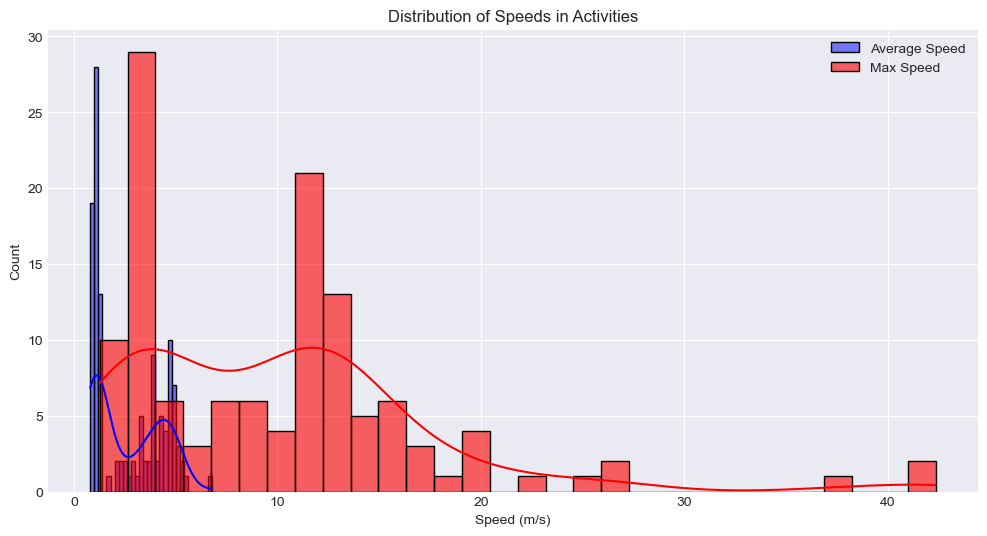

In [44]:
# plot speed distribution
plot_speed_distribution(df)

### 3.  Extract latitude and longitude

With `extract_lat_lon()`, we extract in two columns for each couple of coordenates separated information.

In [45]:
df['start_lat'], df['start_lon'] = zip(*df['start_latlng'].map(extract_lat_lon))
df['end_lat'], df['end_lon'] = zip(*df['end_latlng'].map(extract_lat_lon))
df.head()

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,...,hour,day_of_week,month,is_weekend,season,distance_category,speed_category,start_lon,end_lat,end_lon
0,2,Lunch Walk,3577.7,4433,9352,83.4,Walk,Walk,14870905732,2025-06-21T09:32:17Z,...,9,5,6,True,2,Short,Slow,14.408040,50.085645,14.404228
1,2,Morning Walk,8080.4,9368,79083,93.4,Walk,Walk,14870905942,2025-06-20T08:58:27Z,...,8,4,6,False,2,Medium,Slow,14.440817,50.088818,14.430049
2,2,Afternoon Walk 🇨🇿,7417.3,7577,23468,133.2,Walk,Walk,14853128173,2025-06-19T12:37:46Z,...,12,3,6,False,2,Medium,Slow,14.442733,50.084548,14.448283
4,2,Night Ride,11316.2,2907,50246,30.9,Ride,Ride,14842808101,2025-06-18T06:01:11Z,...,6,2,6,False,2,Medium,Moderate,13.081949,47.789500,13.041727
6,2,Munich to Salzburg 🇩🇪🇦🇹,180945.0,37425,168127,1119.6,Ride,Ride,14810343297,2025-06-13T17:06:04Z,...,17,4,6,False,2,Ultra,Moderate,11.554858,47.810386,13.038394


### 4. Map the Activity starts and end points
With `map_df()`, we visualize where each activity began using folium.


In [46]:
#Show activity start points
fmap = map_df(df)
fmap

### 5. Map of average speead start points
With `map_activities_colored_by_speed()`, we visualize the activity start point color-coded by average speed.

In [47]:
speed_map = map_activities_colored_by_speed(df)
speed_map

# More geostatistical analysis

In [48]:
from strava_analysis import (
    load_strava_data,
    advanced_hotspot_analysis,
    spatial_clustering_analysis,
    create_activity_locations_plot,
    create_hotspots_plot,
    create_performance_distributions_plot,
    create_temporal_patterns_plot,
    create_correlation_heatmap,
    create_distance_speed_scatter,
    create_clusters_plot,
    create_interactive_map,
    create_dashboard_html,
    display_html_map_simple,
    generate_comprehensive_report,
    main_analysis
)

loaded 245 of your raw activities
processed 124 of your activities with enhanced features


/Users/nicolesalazar/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.4-CAPI-1.17.4) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/nicolesalazar/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.4-CAPI-1.17.4) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/nicolesalazar/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.4-CAPI-1.17.4) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/nicolesalazar/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.4-CAPI-1.17.4) i

     hotspots: 4
     coldspots: 0
     spatial clusters: 61
     spatial outliers: 10
     hotspots: 0
     coldspots: 0
     spatial clusters: 72
     spatial outliers: 12
     hotspots: 2
     coldspots: 0
     spatial clusters: 41
     spatial outliers: 9
found 7 clusters with 54 noise points


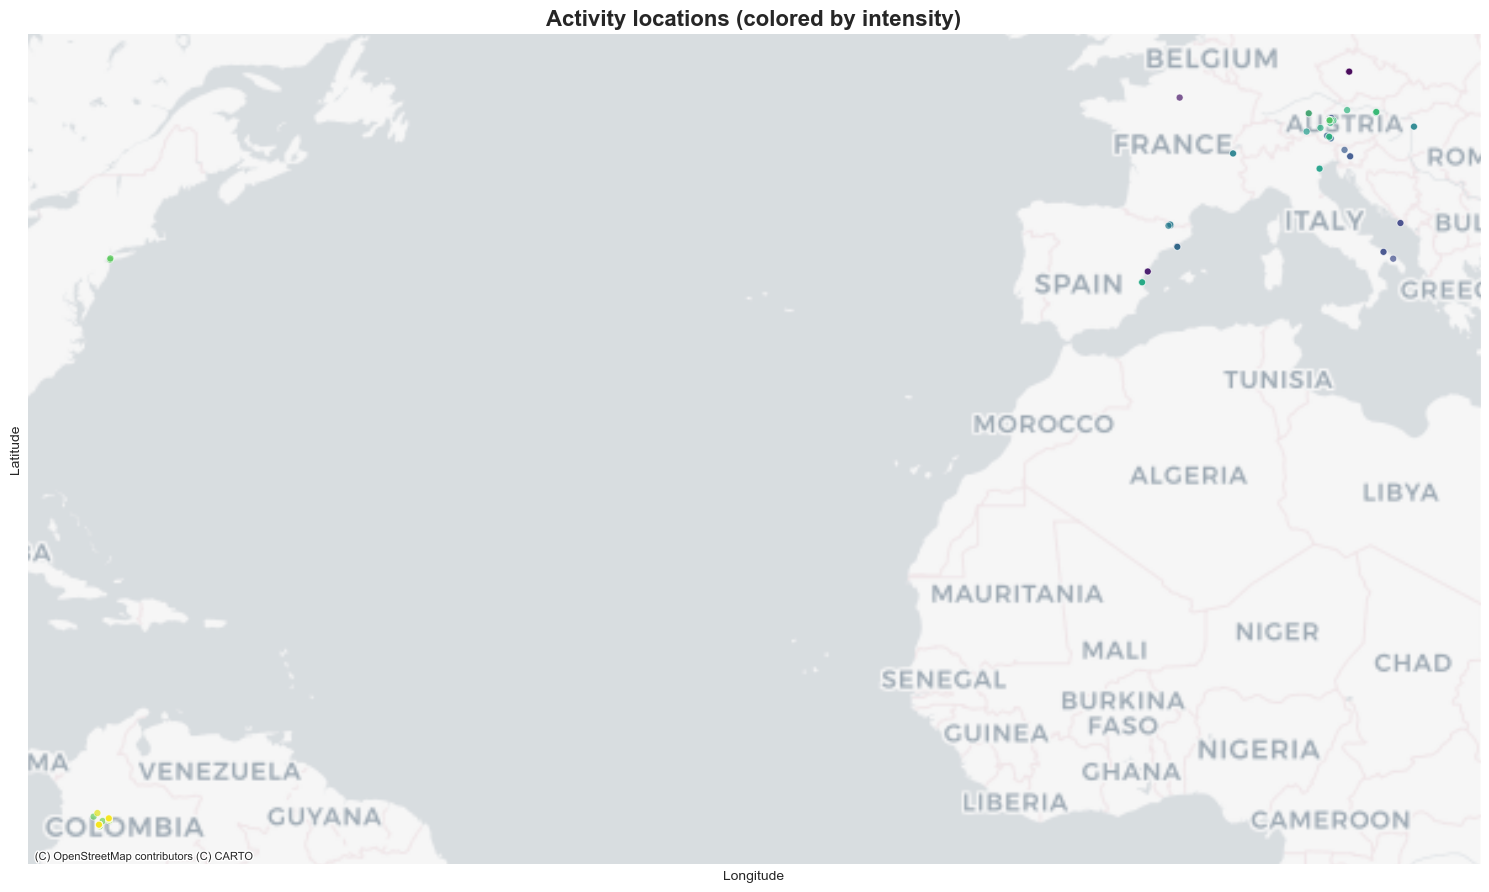

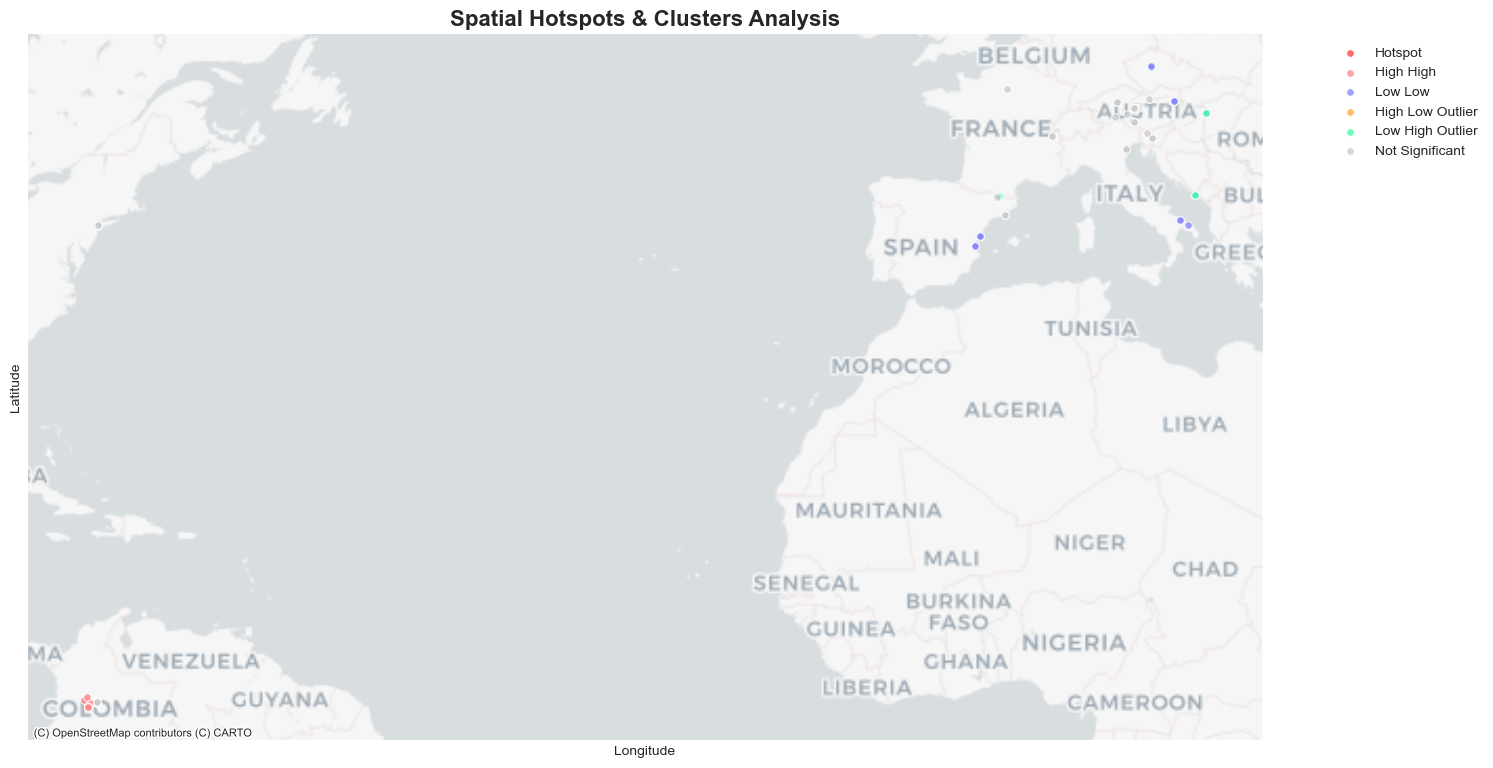

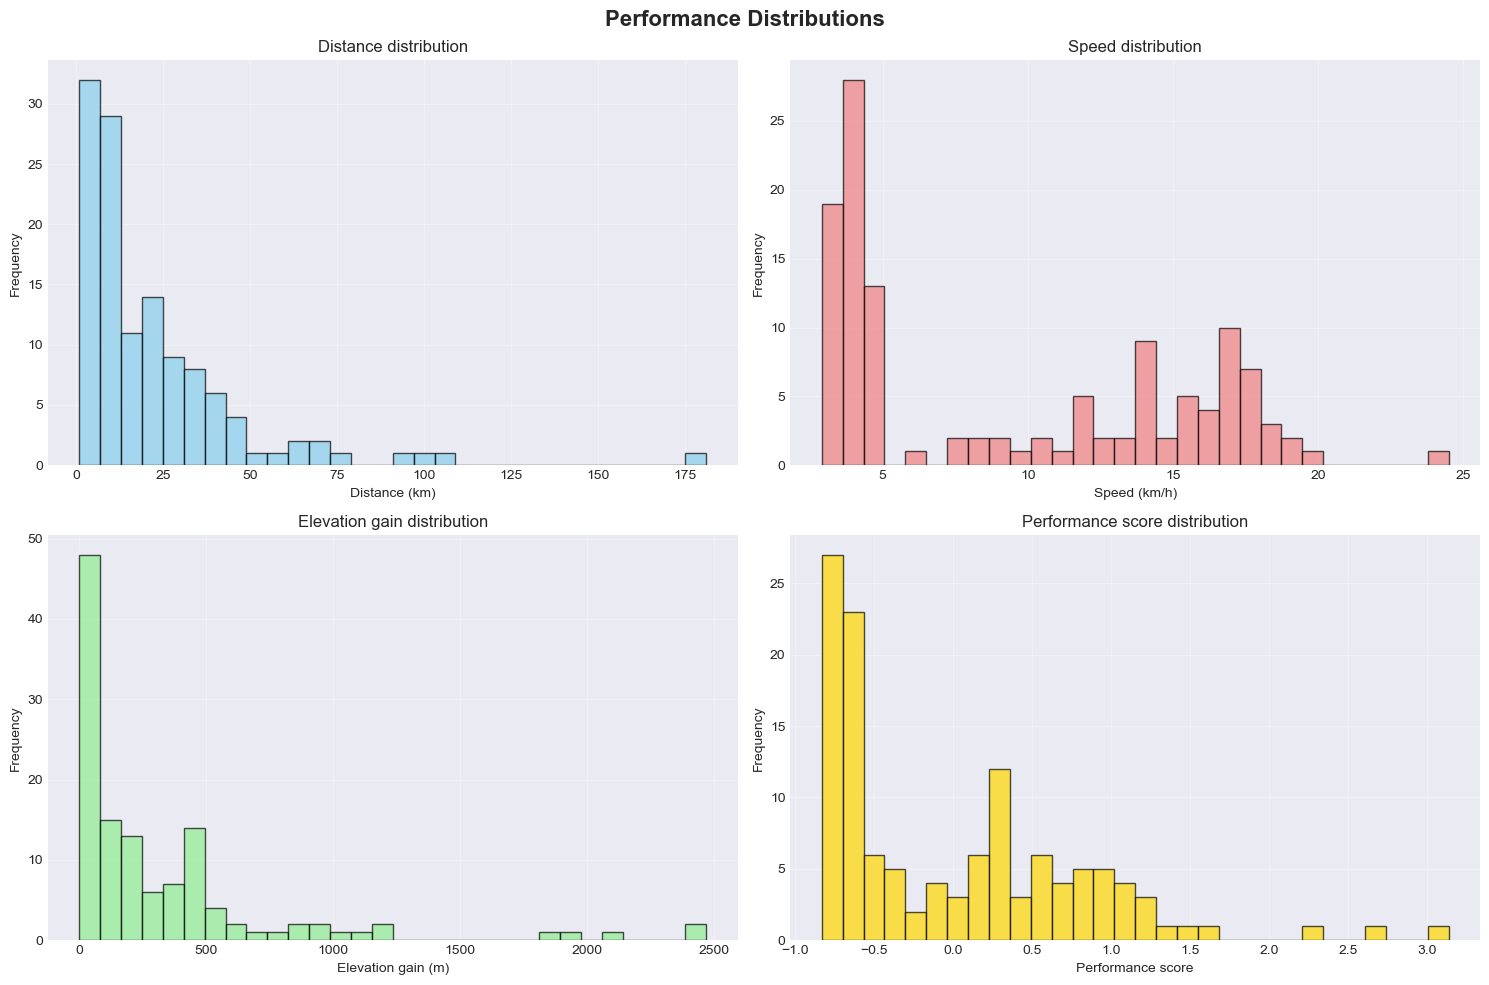

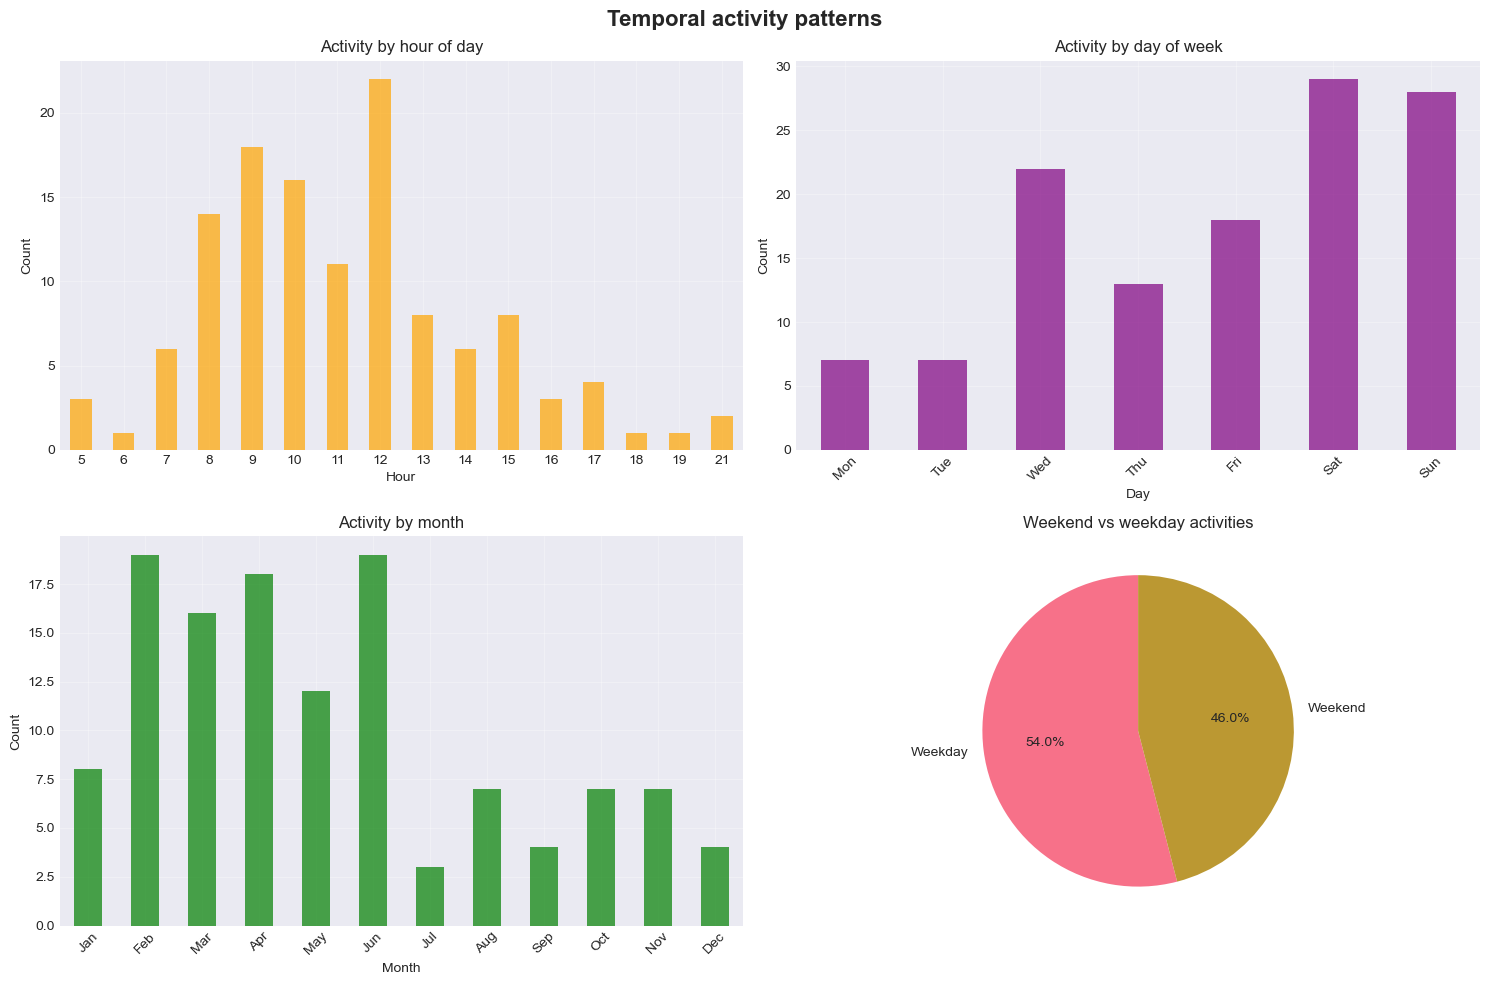

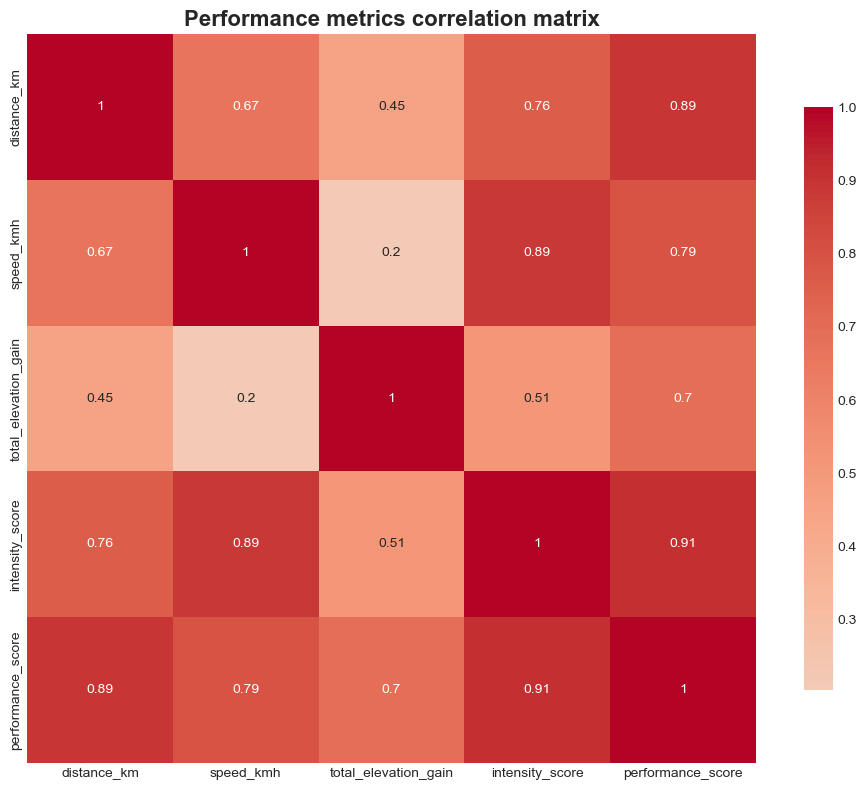

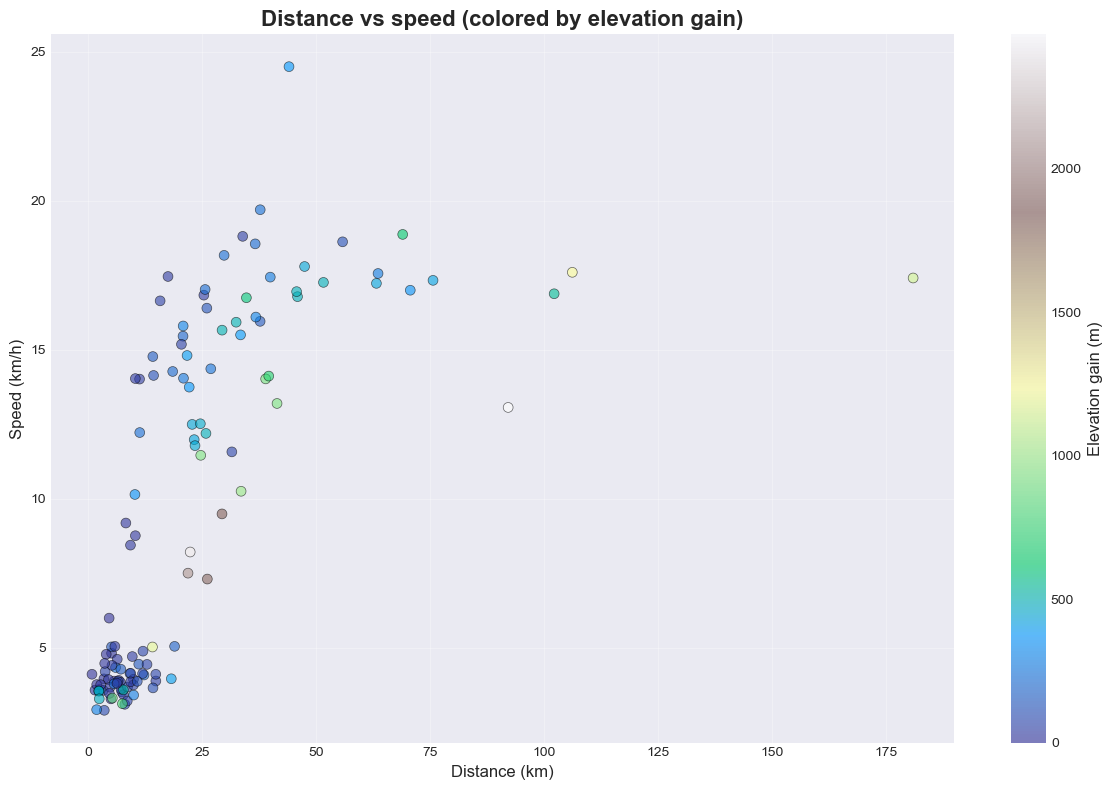

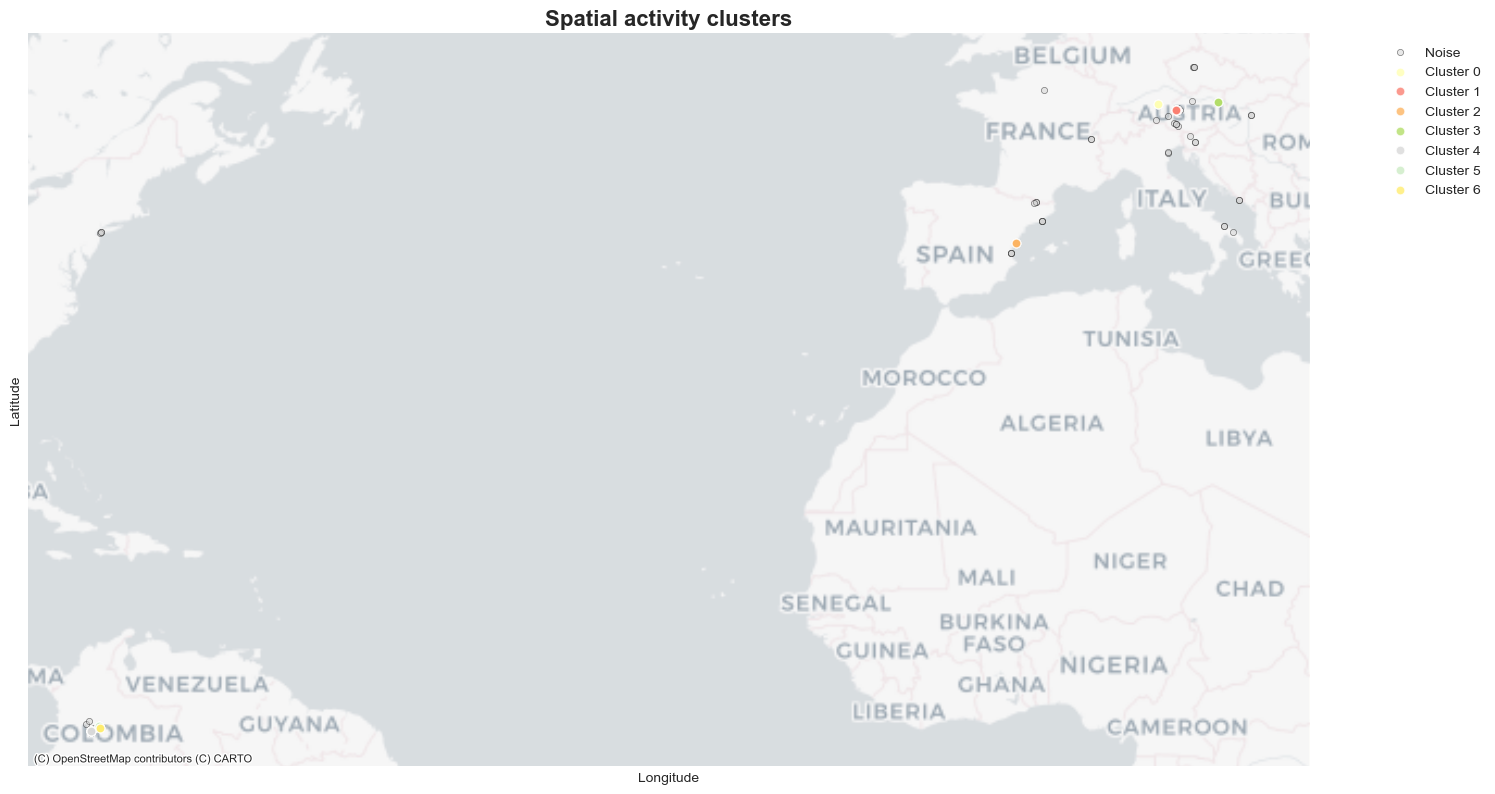


Creating interactive map
saved interactive map: outputs/strava_interactive_map.html

Generating report...
   saved report: strava_comprehensive_report.txt

Creating dashboard...
   saved dashboard: strava_dashboard.html

Exporting results as csv

Analysis complete!

generated files:
• individual visualization PNGs (7 files)
• strava_interactive_map.html (interactive map)
• strava_dashboard.html (beautiful dashboard)
• strava_comprehensive_report.txt (detailed report)
• strava_enhanced_results.csv (enhanced dataset)
opening outputs/strava_interactive_map.html...


   map displayed successfully!
   open this file in your browser !

Quick summary:
• Analyzed 124 activities
• Total distance: 2,757 km
• Average speed: 9.4 km/h
• found 7 spatial clusters

all visualizations are now separate files!
interactive map displayed above (if supported)
open strava_dashboard.html for a beautiful overview!


In [49]:

csv_file = "../LeafletUpdates/nicole_strava.csv"

results = main_analysis(csv_file)

gdf, hotspots, clusters = results
print(f"\nQuick summary:")
print(f"• Analyzed {len(gdf):,} activities")
print(f"• Total distance: {gdf['distance_km'].sum():,.0f} km")
print(f"• Average speed: {gdf['speed_kmh'].mean():.1f} km/h")
if clusters is not None and len(clusters) > 0:
    print(f"• found {len(clusters)} spatial clusters")

print("\nall visualizations are now separate files!")
print("interactive map displayed above (if supported)")
print("open strava_dashboard.html for a beautiful overview!")

In [50]:
from IPython.display import HTML
import base64

with open('outputs/strava_interactive_map.html', 'r', encoding='utf-8') as f:
    html_content = f.read()

iframe_html = f'''
<iframe srcdoc="{html_content.replace('"', '&quot;')}"
        width="100%" height="600" frameborder="0">
</iframe>
'''
HTML(iframe_html)

In [51]:
with open('outputs/strava_dashboard_aru.html', 'r', encoding='utf-8') as f:
    html_content = f.read()

iframe_html = f'''
<iframe srcdoc="{html_content.replace('"', '&quot;')}"
        width="100%" height="600" frameborder="0">
</iframe>
'''
HTML(iframe_html)

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/strava_dashboard_aru.html'

# Creation of the speed and frequency heatmap layers 

## Firstly imports packages and functions, and then goes on to configure the map itself.


In [ ]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
import polyline
from collections import defaultdict
from strava_analysis import create_heatmap_data, decode_polyline, create_base_map, add_heatmap_layers, add_legend, add_layer_control

## Call to the function and create heat map

This section generates an interactive heatmap of the Strava activities using the create_heatmap function. The function reads activity data from a CSV file, decodes the GPS polylines, and computes two types of heatmap layers: one showing the frequency of activity across routes, and another visualizing the average speed along those routes.

The map is currently configured to center over Salzburg, and users can toggle between the speed and  in the map layers.

The final interactive map is saved as an HTML.

In [ ]:

def create_heatmap(csv_file, polyline_column, speed_column, center, zoom, output_file):
    """
    Main function to create the complete heatmap
    """
    # Load data 
    print("Loading CSV...")
    df = pd.read_csv(csv_file)
    print(f"Loaded {len(df)} activities from CSV")
    
    # Process coordinates (using existing create_heatmap_data function)  
    freq_coords, speed_coords = create_heatmap_data(df, polyline_column, speed_column)
    
    if not freq_coords and not speed_coords:
        print("No valid coordinates found. Check your CSV file and columns.")
        return None
    
    # Create map with all components
    m = create_base_map(center, zoom)
    m = add_heatmap_layers(m, freq_coords, speed_coords)
    m = add_legend(m)
    m = add_layer_control(m)
    
    # Save map
    m.save(output_file)
    print(f"Heatmap saved as: {output_file}")
    return m

# Configuration
CSV_FILE = "data/nicole_strava.csv"
POLYLINE_COLUMN = 'map.summary_polyline'
SPEED_COLUMN = 'average_speed'
SALZBURG_CENTER = (47.8095, 13.0550)
ZOOM_LEVEL = 10
OUTPUT_FILE = 'strava_salzburg_heatmap.html'

create_heatmap(CSV_FILE, POLYLINE_COLUMN, SPEED_COLUMN, SALZBURG_CENTER, ZOOM_LEVEL, OUTPUT_FILE)

Loading CSV...
Loaded 245 activities from CSV
Error decoding polyline: name 'polyline' is not defined
Error decoding polyline: name 'polyline' is not defined
Error decoding polyline: name 'polyline' is not defined
Error decoding polyline: name 'polyline' is not defined
Error decoding polyline: name 'polyline' is not defined
Error decoding polyline: name 'polyline' is not defined
Error decoding polyline: name 'polyline' is not defined
Error decoding polyline: name 'polyline' is not defined
Error decoding polyline: name 'polyline' is not defined
Error decoding polyline: name 'polyline' is not defined
Error decoding polyline: name 'polyline' is not defined
Error decoding polyline: name 'polyline' is not defined
Error decoding polyline: name 'polyline' is not defined
Error decoding polyline: name 'polyline' is not defined
Error decoding polyline: name 'polyline' is not defined
Error decoding polyline: name 'polyline' is not defined
Error decoding polyline: name 'polyline' is not defined
Er

# Strava Geographic Route Viewer

In [107]:
# Import all the functions from the interactive_route_elev.py 
from interactive_route_elev import decode_polyline, plot_route_map, plot_elevation_profile, interactive_dashboard

# install missing packages if needed
import pandas as pd
import polyline

## Import the data

In [108]:
# import and visualize the data
df =pd.read_csv( "data/nicole_strava.csv")

# Filter data by Rides
df_rides = df[df.sport_type == 'Ride']
df_rides.head()

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,...,has_kudoed,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,workout_type,average_watts,device_watts,kilojoules
4,2,Night Ride,11316.2,2907,50246,30.9,Ride,Ride,14842808101,2025-06-18T06:01:11Z,...,False,109915717,1,a14842808101,_|rbH}cznA{@_@g@My@Ia@@_AEuAVYNILM\IFO?WUOFKn@...,2,0.0,58.3,False,169.5
6,2,Munich to Salzburg 🇩🇪🇦🇹,180945.0,37425,168127,1119.6,Ride,Ride,14810343297,2025-06-13T17:06:04Z,...,False,109915717,1,a14810343297,kdydHw~oeA|Dqa@XmTd`@aM`EmReQ}`@iAcm@kR}J~LkaA...,2,10.0,61.7,False,2310.4
7,2,Afternoon Ride,14387.4,3664,16494,106.2,Ride,Ride,14779160538,2025-06-12T13:16:19Z,...,False,109915717,1,a14779160538,szxbHsbsnAf@uAJo@Zo@vC_Kv@sDQgEYiLa@}Kc@qKsAkR...,2,NaN,63.0,False,231.0
8,2,Morning Ride,63252.6,13218,23829,433.6,Ride,Ride,14765932446,2025-06-11T07:12:21Z,...,False,109915717,1,a14765932446,_wxbHgkqnAlC@fScFjEeCzDuExJmWv@UQk@zC}V~H_`@rA...,2,10.0,64.5,False,852.3
11,2,Afternoon Ride - Green Route 🇪🇸,10387.0,2665,47587,36.1,Ride,Ride,14690965913,2025-06-03T15:54:56Z,...,False,109915717,1,a14690965913,{wmsF{jKQYMM}@sAEE[GGEi@eAGGIAGEOU_@o@AQOm@_Cc...,2,10.0,38.9,False,103.8


## Select route of interest

In [109]:
df_rides = df[df.name.str.contains("Munich", case=False, na=False)]
df_rides

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,...,has_kudoed,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,workout_type,average_watts,device_watts,kilojoules
6,2,Munich to Salzburg 🇩🇪🇦🇹,180945.0,37425,168127,1119.6,Ride,Ride,14810343297,2025-06-13T17:06:04Z,...,False,109915717,1,a14810343297,kdydHw~oeA|Dqa@XmTd`@aM`EmReQ}`@iAcm@kR}J~LkaA...,2,10.0,61.7,False,2310.4


## Visualize the route on the map
Display the route spatially and the starting and ending point.

In [110]:
# Decode polyline

polyline_str  = df_rides["map.summary_polyline"].iloc[0]
coords = polyline.decode(polyline_str)

# Display the route map
m = plot_route_map(coords)
m


## Retrieve elevation values by coordinate & create cross section
The elevation values are extracted from an API fetched by every point.

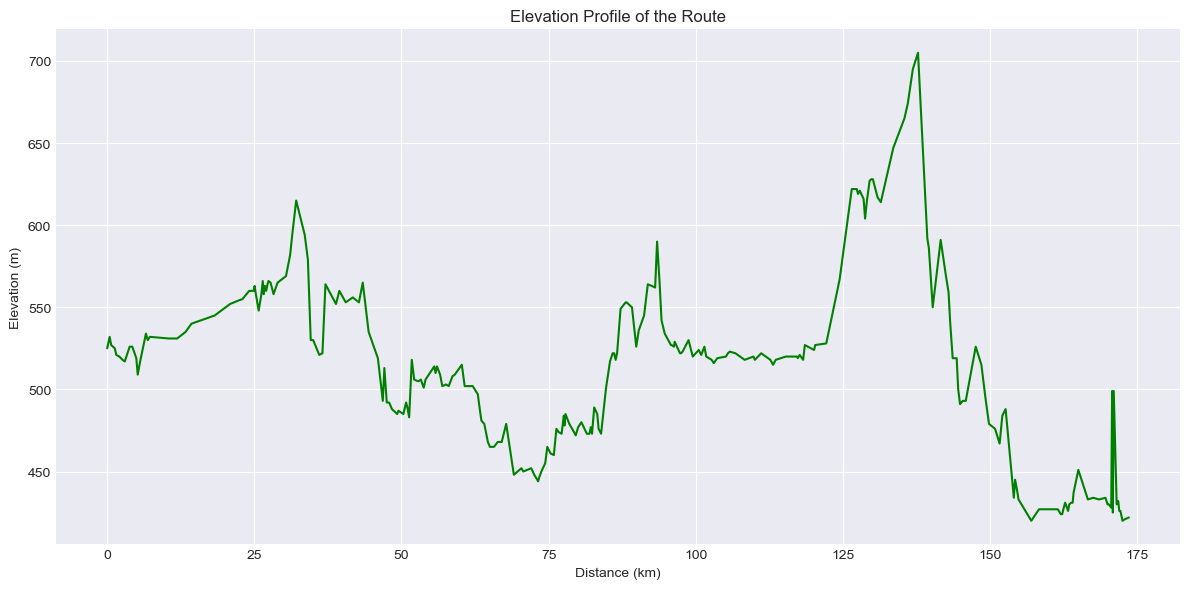

In [111]:
# Decode polyline
coords = decode_polyline(polyline_str)

# Generate elevation profile
plot_elevation_profile(coords)


## Generate interactive dashboard

Generate an interactive dashboard containing the two previous elements created, a map and a elevation profile.

In [112]:
interactive_dashboard(coords)


Found 46 files to process
Processing: ./data/gpx\14196646513.gpx
Processing: ./data/gpx\14508069875.gpx
Processing: ./data/gpx\14705318029.gpx
Processing: ./data/gpx\14734920602.gpx
Processing: ./data/gpx\14734920621.gpx
Processing: ./data/gpx\14734920633.gpx
Processing: ./data/gpx\14734920639.gpx
Processing: ./data/gpx\14734920644.gpx
Processing: ./data/gpx\14734920650.gpx
Processing: ./data/gpx\14734920665.gpx
Processing: ./data/gpx\14734920670.gpx
Processing: ./data/gpx\14734920677.gpx
Processing: ./data/gpx\14736586592.gpx
Processing: ./data/gpx\14736586595.gpx
Processing: ./data/gpx\14736586614.gpx
Processing: ./data/gpx\14736586633.gpx
Processing: ./data/gpx\14736586653.gpx
Processing: ./data/gpx\14736586659.gpx
Processing: ./data/gpx\14736586665.gpx
Processing: ./data/gpx\14736586673.gpx
Processing: ./data/gpx\14736586681.gpx
Processing: ./data/gpx\14736586684.gpx
Processing: ./data/gpx\14736586690.gpx
Processing: ./data/gpx\14736586698.gpx
Processing: ./data/gpx\14736586726.gpx

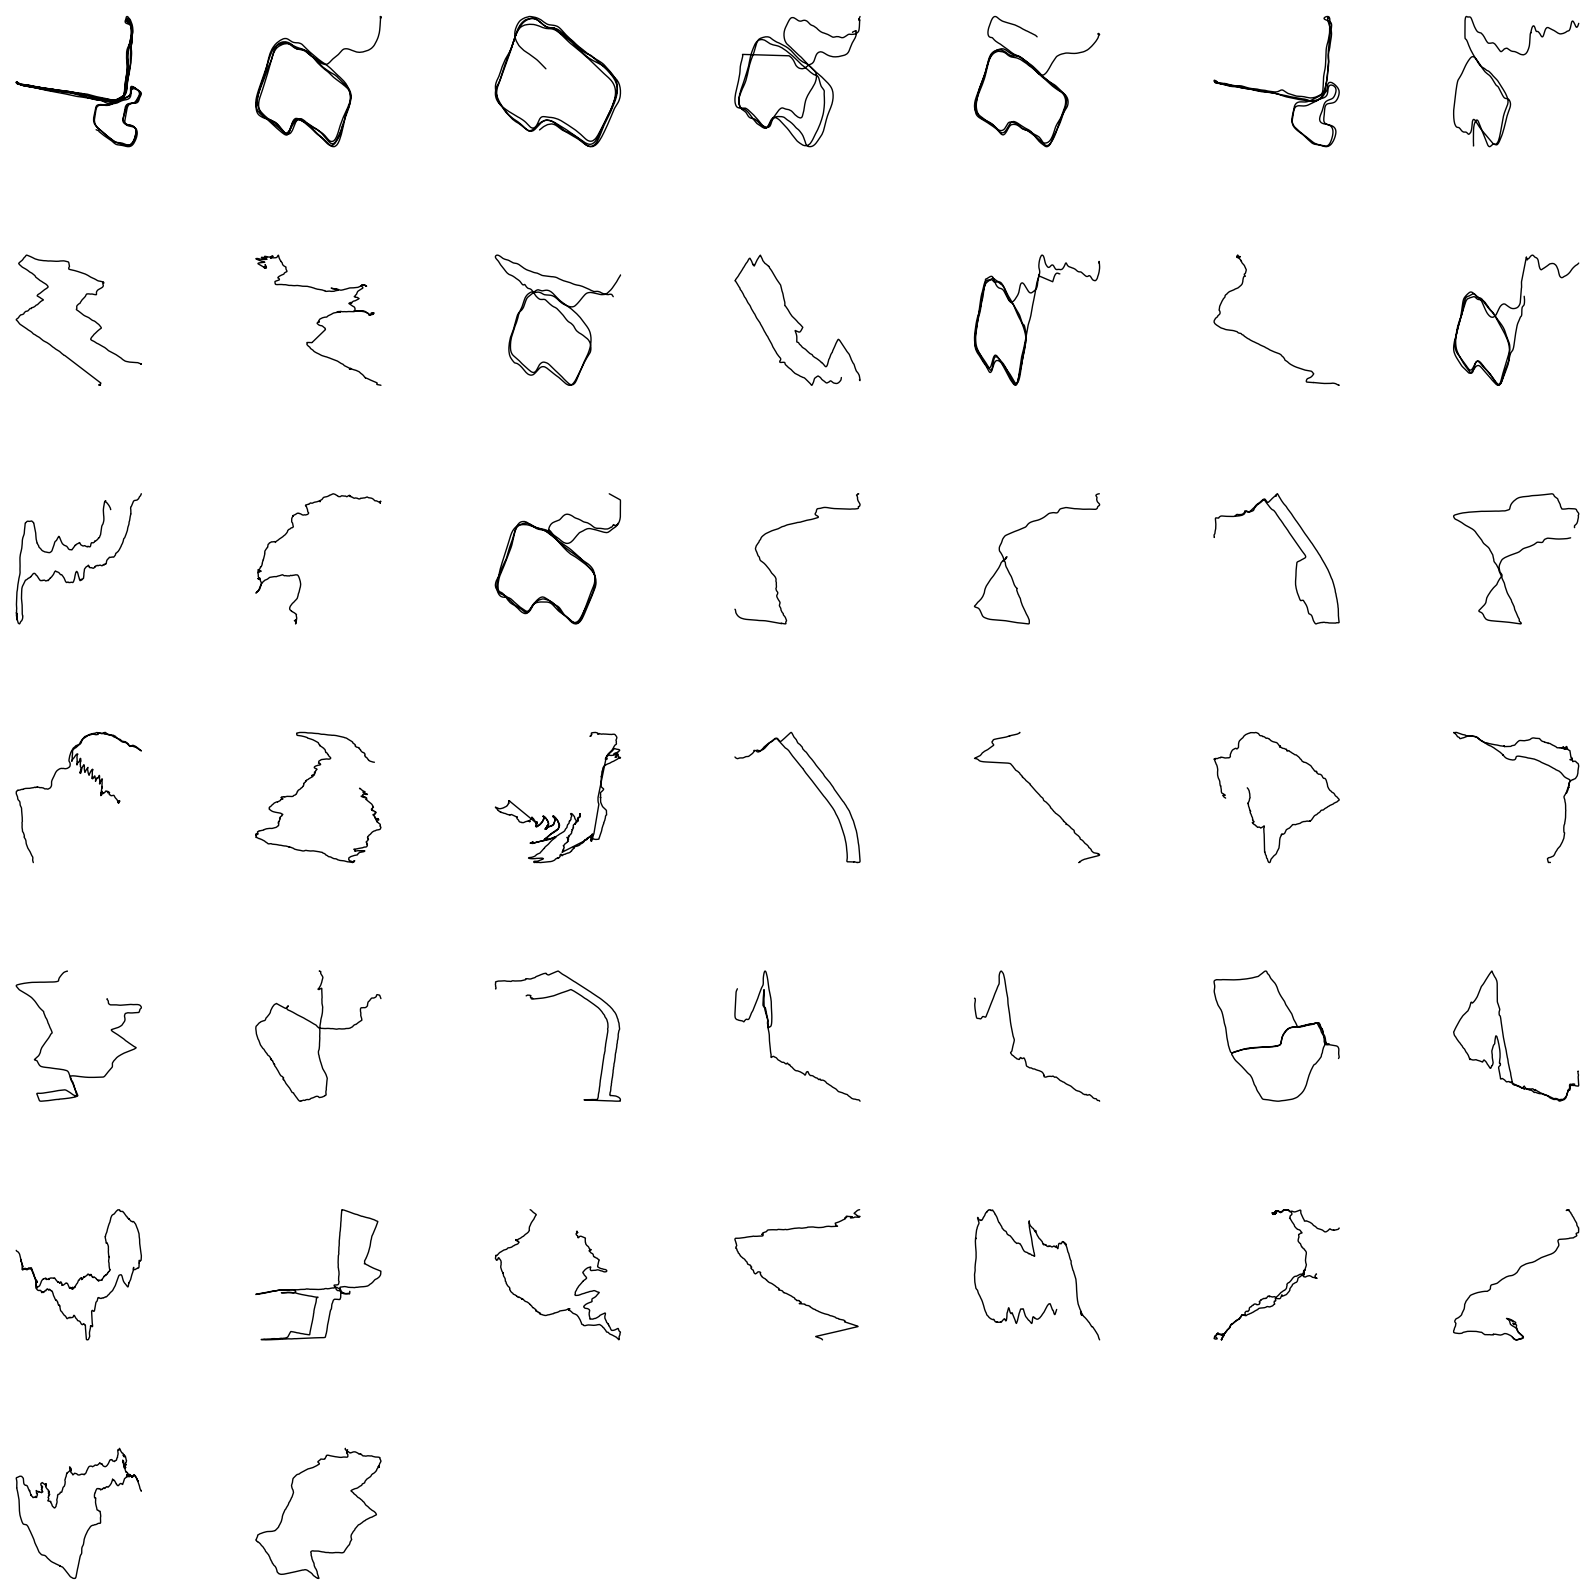

In [4]:
from facets import analyze_activities  
df = analyze_activities(folder="./data/gpx")